# VGGCIFAR


## 0. Preparation

In [1]:
# import modules
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# consts
NUM_CLASSES = 10
BATCH_SIZE = 200

In [26]:
# plot function
def plot_history(history):
    # plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    plt.show()
    
    # plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(20))
    plt.show() 

## 1. Preprocessing

In [4]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
#split data into training and valuation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size = 0.1,
    train_size=0.9, 
    random_state=42,
    shuffle=True
)

In [6]:
# data augmentation & normalization

#training data
trainGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

trainGenerator.fit(x_train)

# valuation data
valGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valGenerator.fit(x_val)

## 2. Model Definition

In [16]:
# definition
model = Sequential([
    Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dropout(0.25),
    Dense(4*4*256),
    Activation('relu'),
    
    Dropout(0.25),
    Dense(1024),
    Activation('relu'),
    
    
    Dense(NUM_CLASSES),
    Activation('softmax')
])

## 3. Learning

In [17]:
# optimizer
optimizer = Adam()

In [18]:
# compile
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Epoch
EPOCHS = 100

In [20]:
# learning
history = model.fit_generator(
    trainGenerator.flow(x_train, y_train, BATCH_SIZE),
    epochs=EPOCHS,
    verbose=1,
    #callbacks=[earlyStopping],
    validation_data=valGenerator.flow(x_val, y_val, BATCH_SIZE)
)


Epoch 1/100
225/225 [==============================] - 136s 605ms/step - loss: 3.0330 - acc: 0.1209 - val_loss: 2.5694 - val_acc: 0.1248
Epoch 2/100
225/225 [==============================] - 130s 577ms/step - loss: 1.9431 - acc: 0.2705 - val_loss: 2.3118 - val_acc: 0.2364
Epoch 3/100
225/225 [==============================] - 130s 576ms/step - loss: 1.5835 - acc: 0.4016 - val_loss: 1.8100 - val_acc: 0.3280
Epoch 4/100
225/225 [==============================] - 130s 579ms/step - loss: 1.3919 - acc: 0.4828 - val_loss: 1.6911 - val_acc: 0.4114
Epoch 5/100
225/225 [==============================] - 130s 577ms/step - loss: 1.2361 - acc: 0.5537 - val_loss: 1.3229 - val_acc: 0.5298
Epoch 6/100
225/225 [==============================] - 129s 574ms/step - loss: 1.1174 - acc: 0.6015 - val_loss: 2.1642 - val_acc: 0.4300
Epoch 7/100
225/225 [==============================] - 129s 575ms/step - loss: 1.0233 - acc: 0.6405 - val_loss: 1.4088 - val_acc: 0.5104
Epoch 8/100
225/225 [====================

225/225 [==============================] - 144s 639ms/step - loss: 0.2474 - acc: 0.9163 - val_loss: 0.6466 - val_acc: 0.7956
Epoch 61/100
225/225 [==============================] - 144s 642ms/step - loss: 0.2417 - acc: 0.9179 - val_loss: 0.6391 - val_acc: 0.8014
Epoch 62/100
225/225 [==============================] - 144s 639ms/step - loss: 0.2356 - acc: 0.9196 - val_loss: 0.7221 - val_acc: 0.7888
Epoch 63/100
225/225 [==============================] - 144s 640ms/step - loss: 0.2327 - acc: 0.9215 - val_loss: 0.6665 - val_acc: 0.7966
Epoch 64/100
225/225 [==============================] - 143s 635ms/step - loss: 0.2311 - acc: 0.9203 - val_loss: 0.7407 - val_acc: 0.7862
Epoch 65/100
225/225 [==============================] - 145s 643ms/step - loss: 0.2249 - acc: 0.9229 - val_loss: 0.8977 - val_acc: 0.7530
Epoch 66/100
225/225 [==============================] - 144s 641ms/step - loss: 0.2240 - acc: 0.9229 - val_loss: 0.7116 - val_acc: 0.7906
Epoch 67/100
225/225 [=========================

## 4. Evaluation

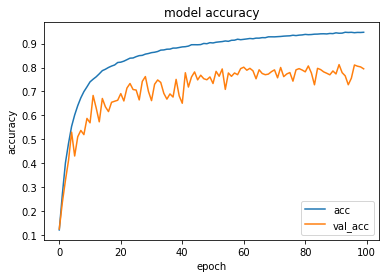

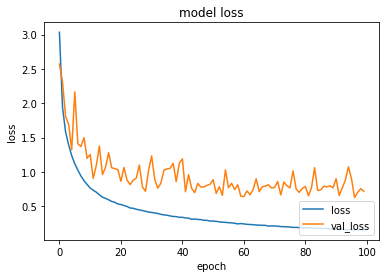

In [27]:
plot_history(history)